In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [90]:
acc = pd.read_csv("QS\Cycling\QS 2024-06-04 16-15-10\Accelerometer.csv")
loc = pd.read_csv("QS\Cycling\QS 2024-06-04 16-15-10\Location.csv")

acc = acc[(acc["Time (s)"] > 5) & (acc["Time (s)"] < max(acc["Time (s)"]) - 5)]
loc = loc[(loc["Time (s)"] > 5) & (loc["Time (s)"] < max(loc["Time (s)"]) - 5)]

print(acc["Time (s)"])
print(loc["Time (s)"])

126       5.009794
127       5.049794
128       5.089794
129       5.129794
130       5.169794
           ...    
4220    168.769794
4221    168.809794
4222    168.849794
4223    168.889794
4224    168.929794
Name: Time (s), Length: 4099, dtype: float64
7        5.428601
8        6.428335
9        7.429103
10       8.432690
11       9.434421
          ...    
165    163.427264
166    164.425113
167    165.428604
168    166.426452
169    167.428872
Name: Time (s), Length: 163, dtype: float64


In [97]:
loc = loc[(np.abs(stats.zscore(loc)) < 3).all(axis=1)]
acc = acc[(np.abs(stats.zscore(acc)) < 3).all(axis=1)]

<Axes: >

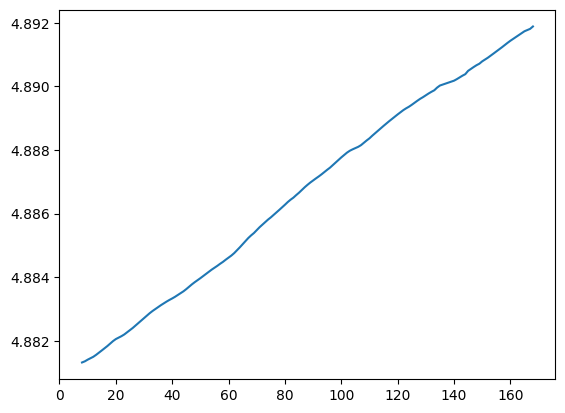

In [98]:
loc['Longitude (°)'].plot()

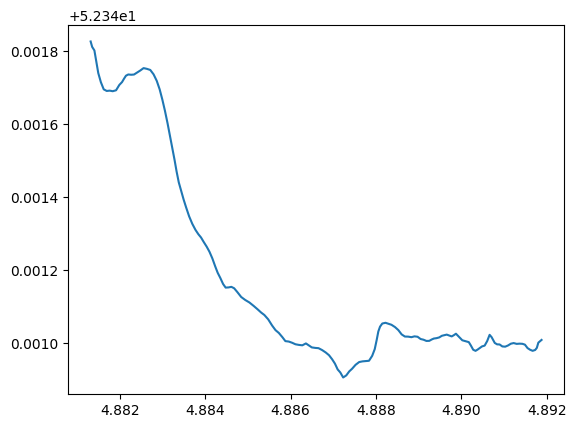

In [99]:
plt.plot(loc['Longitude (°)'], loc['Latitude (°)'])

In [74]:
acc.drop_duplicates(subset=["Acceleration x (m/s^2)", "Acceleration y (m/s^2)", "Acceleration z (m/s^2)"], inplace=True)

In [100]:
x = pd.merge_asof(loc, acc, on="Time (s)", direction="nearest")
x

,Time (s),Latitude (°),Longitude (°),Height (m),Velocity (m/s),Direction (°),Horizontal Accuracy (m),Vertical Accuracy (m),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2)
0,6.428335,52.341825,4.881318,-9.764151,3.96,105.199997,5.767728,7.752633,-9.138788,-0.961915,5.036592
1,7.429103,52.341810,4.881354,-10.567862,3.90,108.199997,5.669216,7.602097,-5.834300,-10.921142,2.912962
2,8.432690,52.341801,4.881406,-3.762365,4.27,113.500000,5.304637,7.096403,-5.809175,-10.068399,5.510970
3,10.434891,52.341739,4.881497,-2.032176,4.76,131.399994,4.331667,5.399944,-6.177969,-7.245168,4.661518
4,11.433171,52.341714,4.881558,-2.366588,5.20,124.099998,3.980693,4.694923,-4.584947,-4.162315,4.843671
...,...,...,...,...,...,...,...,...,...,...,...
151,162.427632,52.340979,4.891672,8.887018,3.82,92.400002,10.079730,4.137504,-8.545966,-6.121737,3.308077
152,163.427264,52.340982,4.891730,8.274079,4.08,79.099998,10.072148,4.138908,-9.478868,-5.355137,3.174079
153,164.425113,52.340987,4.891770,8.488831,3.06,74.000000,10.501380,3.892690,-7.663313,-4.417449,3.324827
154,165.428604,52.341002,4.891806,9.194561,3.10,58.000000,10.677667,3.831601,-7.527820,-4.108177,3.132205


<Axes: >

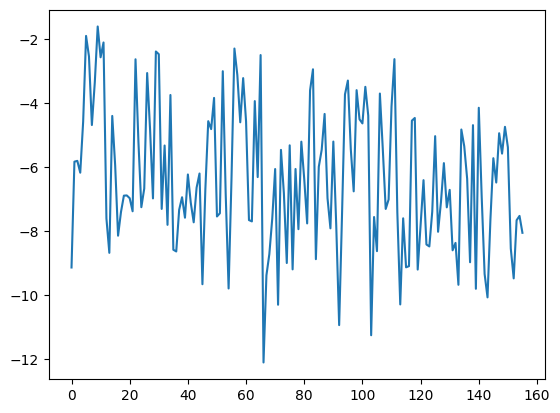

In [101]:
x["Acceleration x (m/s^2)"].plot()

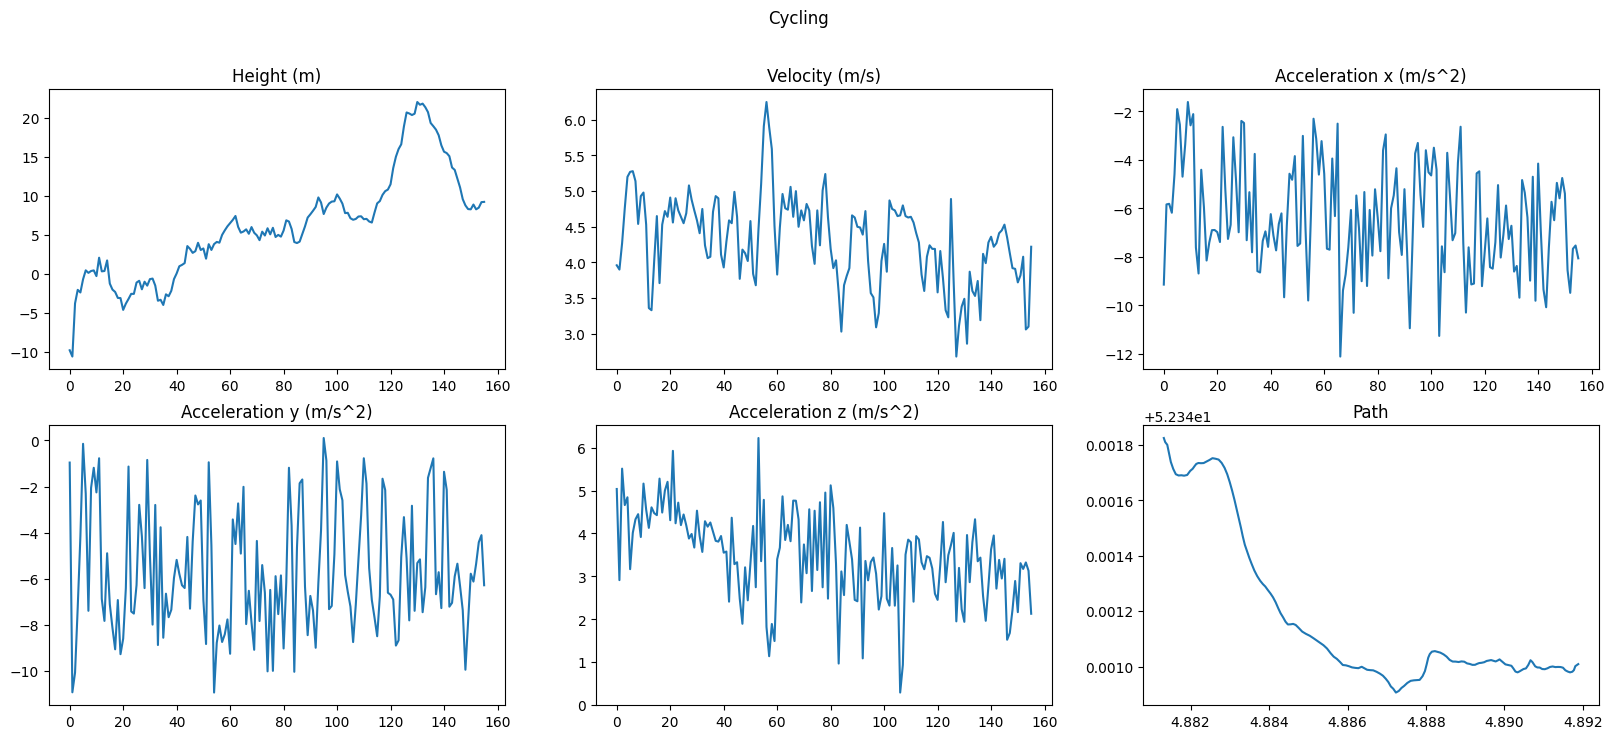

In [102]:
fig, ax = plt.subplots(2,3)
fig.set_size_inches(20, 8)
plt.plot(x['Longitude (°)'], x['Latitude (°)'])
plt.title("Path")
for i, c in enumerate(x.columns[3:5].append(x.columns[8:])):
    x[c].plot(ax=ax.flatten()[i])
    ax.flatten()[i].set_title(c)

plt.suptitle("Cycling")
plt.show()
    